In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [3]:
# Needed these other options, or I got:
# 'UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 0-1: invalid continuation byte'
df = pd.read_csv('megastore_sales.csv', encoding = 'latin')

In [4]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Salesperson,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [5]:
# 1.	Clean up the data by dropping any rows with missing values.
df.dropna().head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Salesperson,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [6]:
# 2.	List the Top 5 salespeople in Sales according to each segment.

topSalesPeople = df[['Salesperson', 'Sales']].nlargest(5, 'Sales')
topSalesPeople

,Salesperson,Sales
2697,Christine Abelman,22638.480
6826,Justin Ellison,17499.950
8153,Sean Braxton,13999.960
2623,Cassandra Brandow,11199.968
4190,Dean Katz,10499.970


In [7]:
# 3.	Create a calculated column called ‘Price’ (=Sales / Quantity) for each product. 
df['Price'] = df.Sales * df.Quantity

df.head(4)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Salesperson,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price
0,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.9200
1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.8200
2,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.2400
3,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4787.8875


In [8]:
# 4.	Show the sum of ‘Profit’ for each region (highest first) (use .agg method).  

profitRegion = df.Profit.groupby(df['Region']).agg(['sum']).sort_values('sum', ascending=False)
profitRegion

,sum
Region,
West,108418.4489
East,91522.7800
South,46749.4303
Central,39700.1417


In [9]:
# 5.	Using groupby, display the top 3 sales for each category and subcategory.

salesByCategory = df.groupby('Category').sum().sort_values('Sales', ascending=False)
salesByCategory

,Postal Code,Sales,Quantity,Discount,Profit,Price
Category,,,,,,
Technology,102603754.0,836154.0330,6939,244.40,145454.9481,4.080262e+06
Furniture,118196026.0,741999.7953,8028,368.89,18451.2728,3.859215e+06
Office Supplies,330720570.0,719034.0720,22904,947.80,122484.5800,3.548559e+06


In [10]:
# 6.	Using a pivot table, show the sum and mean of ‘Sales’ in terms of Profit and Category and Shipped. 
table = df.pivot_table(index=['Profit', 'Category', 'Ship Date'], values=['Sales'], aggfunc=['mean', 'sum'], margins=True).round(2)
table

,,,mean,sum
,,,Sales,Sales
Profit,Category,Ship Date,,
-6599.978,Technology,02/12/2016,4499.98,4499.98
-3839.9904,Technology,04/11/2017,7999.98,7999.98
-3701.8928,Office Supplies,30/07/2014,2177.58,2177.58
-3399.98,Technology,23/04/2017,2549.98,2549.98
-2929.4845,Office Supplies,13/12/2017,1889.99,1889.99
...,...,...,...,...
4946.37,Office Supplies,21/12/2016,9892.74,9892.74
5039.9856,Technology,22/11/2017,10499.97,10499.97


In [11]:
# 7.	Find the Technology Accessories sold in New York City worth more than $300 and sold by Nathan Mautz in 2014. 

technologyNY = df.loc[(df['Category'] == 'Technology') & (df['City'] == 'New York City') & (df['Salesperson'] == 'Nathan Mautz')\
                      & (df['Price'] > 300)]
technologyNY.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Salesperson,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price
318,CA-2014-164973,04/11/2014,09/11/2014,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,New York,...,East,TEC-MA-10002927,Technology,Machines,Canon imageCLASS MF7460 Monochrome Digital Las...,3991.98,2,0.0,1995.9900,7983.96
319,CA-2014-164973,04/11/2014,09/11/2014,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,New York,...,East,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,275.94,6,0.0,80.0226,1655.64
320,CA-2014-164973,04/11/2014,09/11/2014,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,New York,...,East,TEC-AC-10000892,Technology,Accessories,NETGEAR N750 Dual Band Wi-Fi Gigabit Router,360.00,4,0.0,129.6000,1440.00


In [12]:
# 8.	Find all the products with ID #TEC-PH-10003273 in the ‘Home office’ segment that were shipped ‘Second class’ in 2014.
df2 = df.loc[(df['Product ID'] == 'TEC-PH-10003273') & (df['Segment'] == 'Home Office') & (df['Ship Mode'] == 'Second Class')\
            & (2014 in df['Ship Date'])]

df2

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Salesperson,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price
182,CA-2014-158274,19/11/2014,24/11/2014,Second Class,RM-19675,Robert Marley,Home Office,United States,Monroe,Louisiana,...,South,TEC-PH-10003273,Technology,Phones,AT&T TR1909W,503.96,4,0.0,131.0296,2015.84


<AxesSubplot:xlabel='State'>

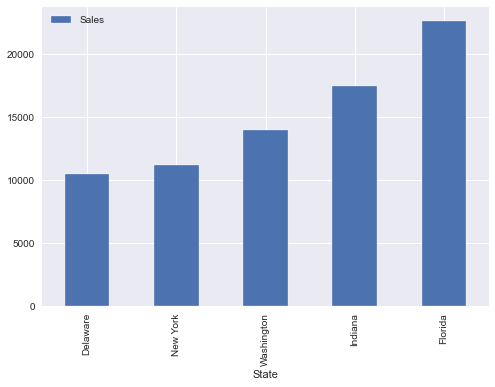

In [23]:
# 9.	Any sales visualisation (graph) that you think would help the MegaStore management to interpret their sales data better.
df_product = df[['Sales','State']].nlargest(5, 'Sales')
df_product.groupby(['State']).sum().sort_values('Sales', ascending=True).plot(kind = 'bar')